Perform the following visualisations
1. Create subplots of regression plot considering variables in table dailyActivity_merged.
2. Report the distribution for VeryActiveMinutes, FairlyActiveMinutes, and LightlyActiveMinutes.
3. Can you answer from the plot if all users were using the tracker during the entire day in the analysed period ie., If a user logs the whole day

Note : if all users were using the tracker during the entire day in the analysed period. If a user logs the whole day, then the sum VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes + SedentaryMinutes should be equal to 1440 minutes (the total number of minutes in a day).

4. Print the number of users logged the whole day.
5. Print the number of users not logged whole day.

Note : if all users were using the tracker during the entire day in the analysed period. If a user logs the whole day, then the sum VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes + SedentaryMinutes should be equal to 1440 minutes (the total number of minutes in a day).

In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import os

In [10]:
path = '../Data'
full_path_list = [ path + '/' + f for \
                 f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) ]
full_path_list

['../Data/dailyActivity_merged.csv',
 '../Data/dailyCalories_merged.csv',
 '../Data/dailyIntensities_merged.csv',
 '../Data/dailySteps_merged.csv',
 '../Data/sleepDay_merged.csv',
 '../Data/weightLogInfo_merged.csv']

In [11]:
con = sql.connect("fitbit.db")
cur = con.cursor()

In [12]:
#The fitbit dataset is inclusive of hours and minutes datasets as well. However, for the purpose of this exercise,
# it is chosen to analyze daily aggregated data only.

# connect to sql db
con = sql.connect("fitbit.db")
cur = con.cursor()

def get_table_name(full_path_list, i):
    return full_path_list[i].split("/")[-1].split('.')[0]

pbar = tqdm(total=len(full_path_list), desc='[Loading Data...]')
for i in range(0,len(full_path_list)):
    pd.read_csv(full_path_list[i]).to_sql(get_table_name(full_path_list, i), con, if_exists='append', index=False)
    pbar.update(1)
pbar.close()

# simple sql query test
df = pd.read_sql(f'SELECT * FROM {get_table_name(full_path_list, 0)}', con)

df.head()

[Loading Data...]: 100%|█████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 14.45it/s]


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [13]:
full_info_activity = """
SELECT *,
    STRFTIME('%d',ActivityDate) day,
    STRFTIME('%m',ActivityDate) month,
    STRFTIME('%Y',ActivityDate) year,
    STRFTIME('%w',ActivityDate) dow
FROM dailyActivity_merged;
"""

In [14]:
dailyActivity_df = pd.read_sql(full_info_activity, con)
dailyActivity_df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,month,year,dow
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,None,None,None,None
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,None,None,None,None
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,None,None,None,None
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,None,None,None,None
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,None,None,None,None
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,None,None,None,None
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,None,None,None,None
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,None,None,None,None


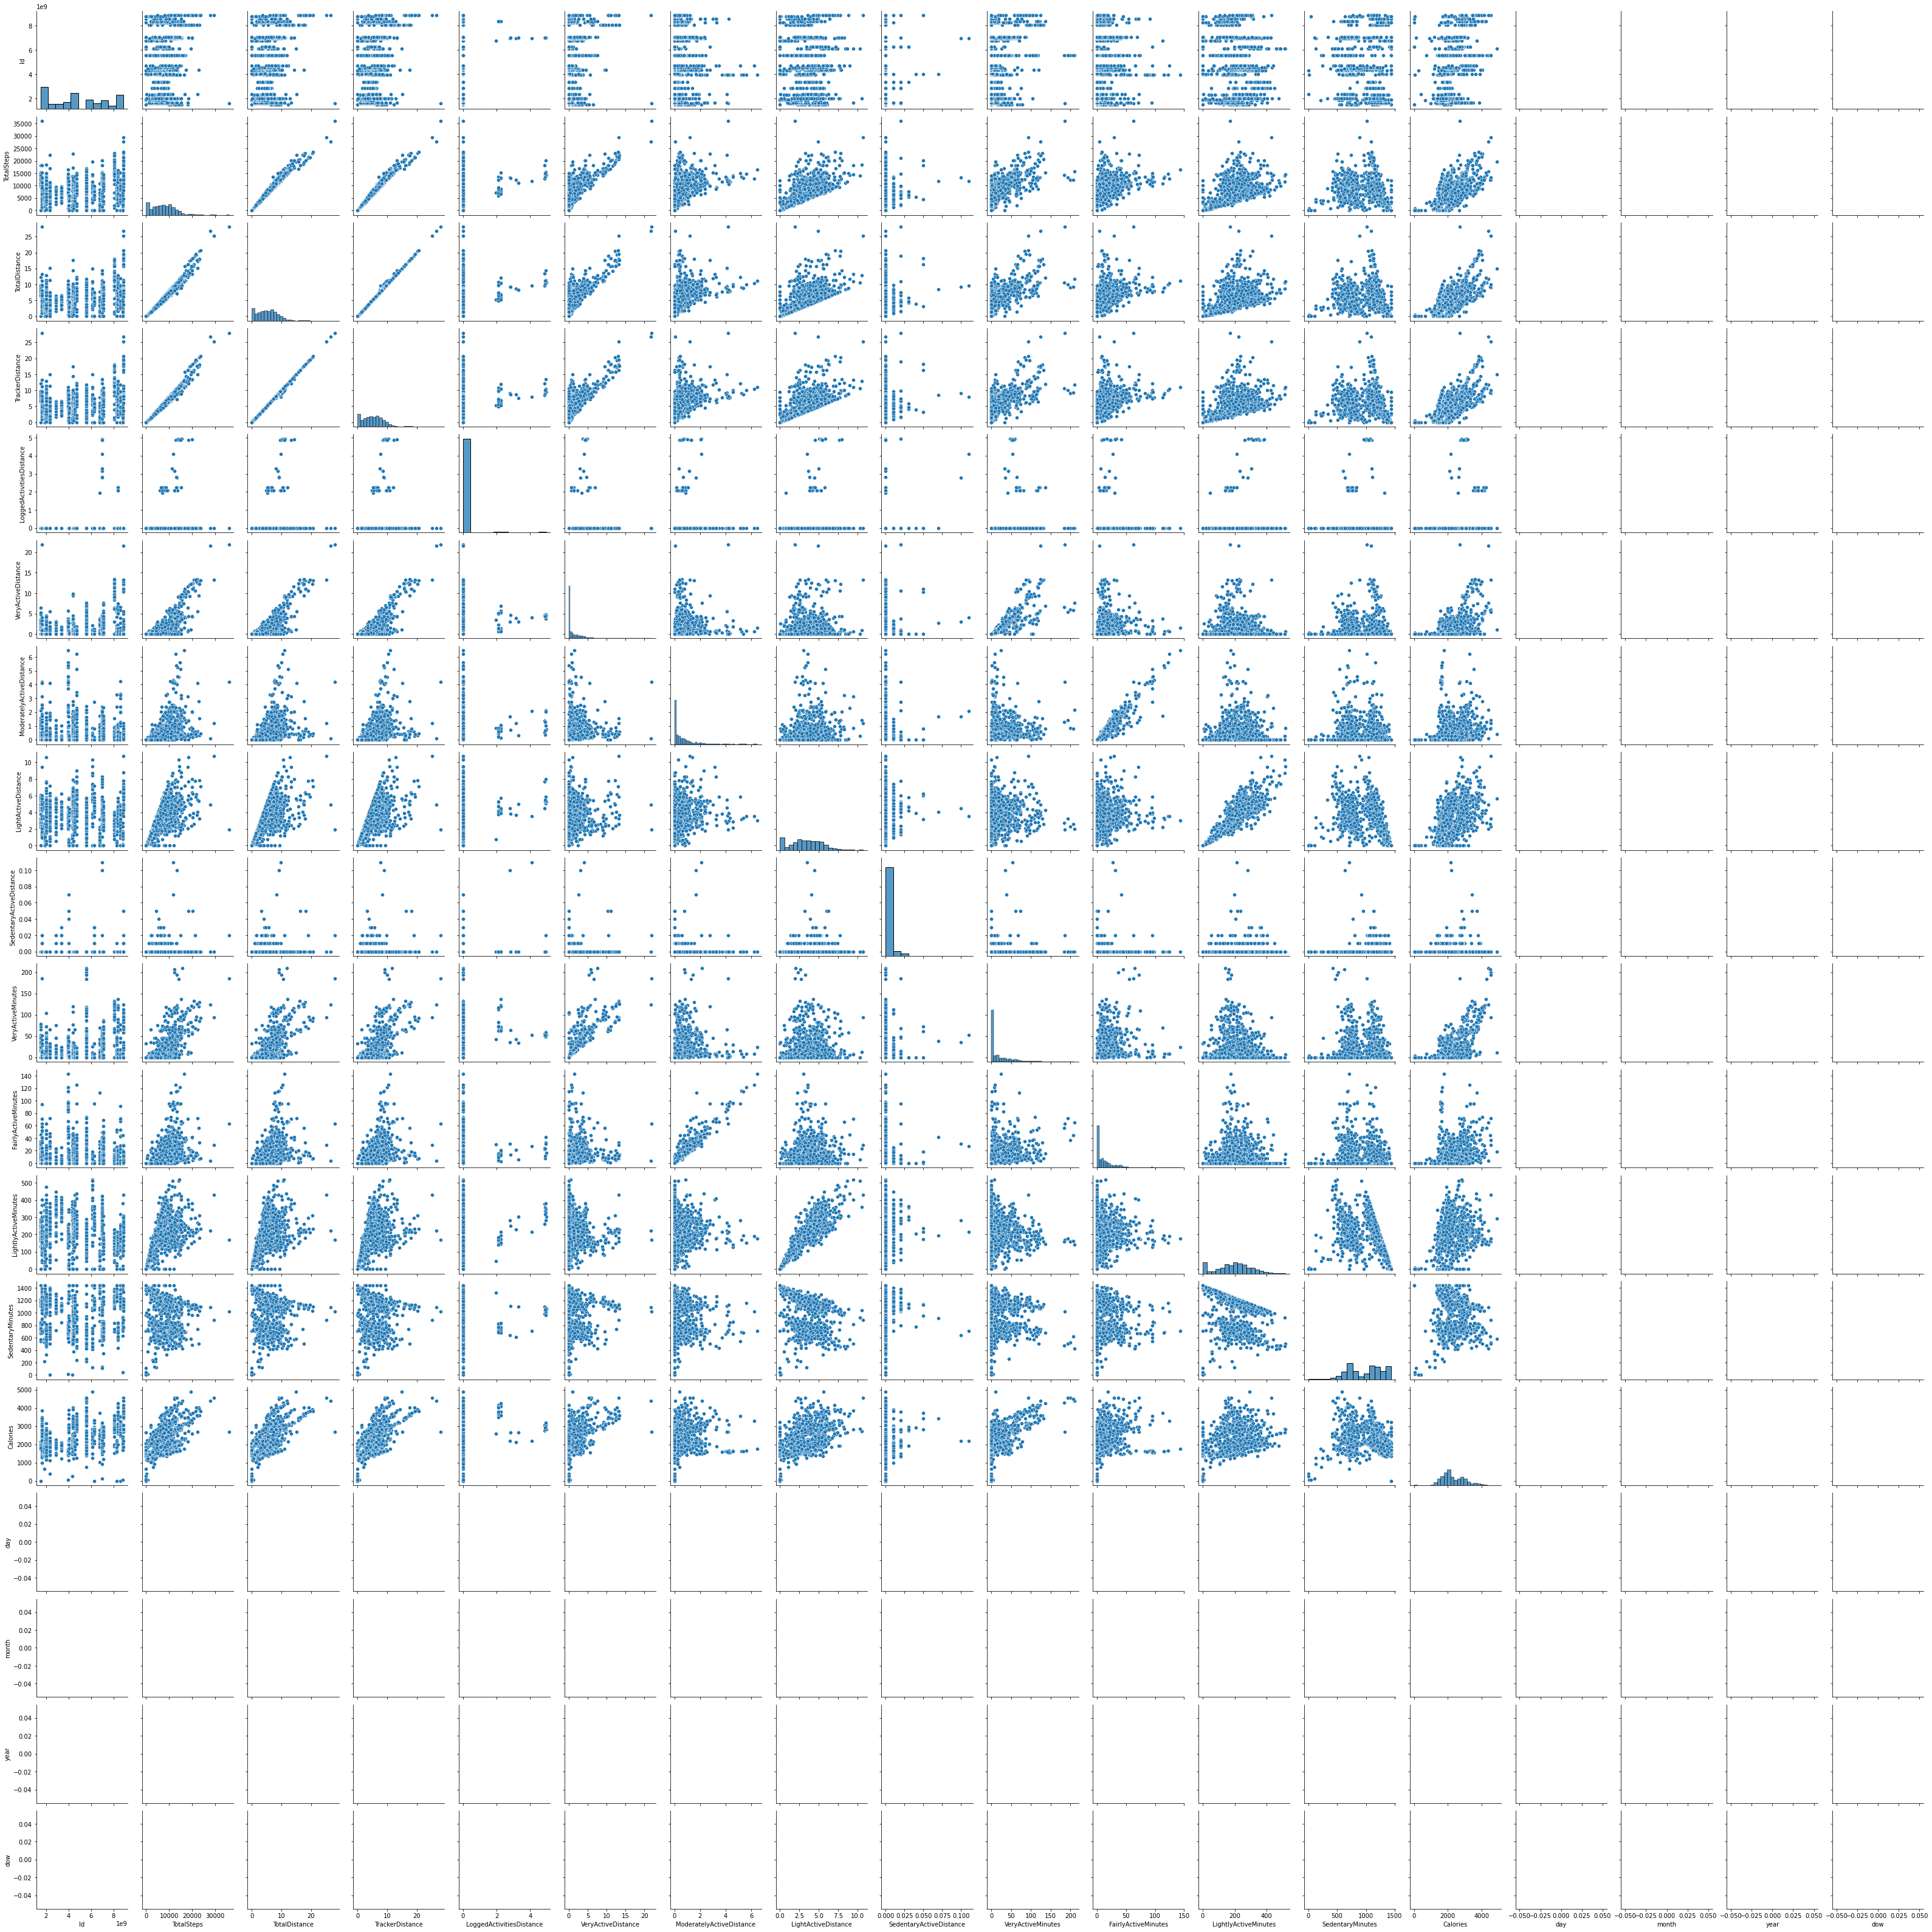

In [15]:
sns.pairplot(dailyActivity_df)

VeryActiveMinutes 



C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


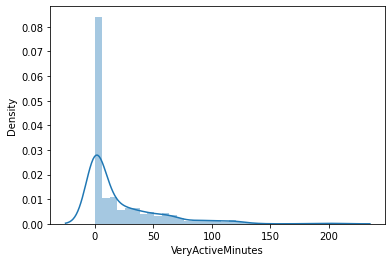


FairlyActiveMinutes 



C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


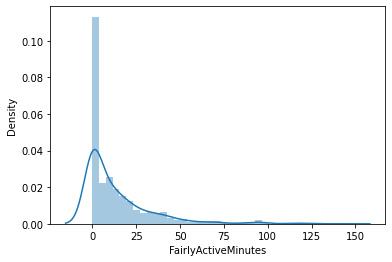


LightlyActiveMinutes 



C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


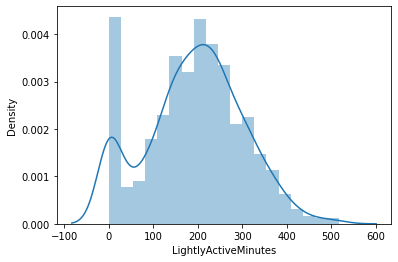

In [16]:
for i in ["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes"]:
    print(i,"\n")
    sns.distplot(dailyActivity_df[i])
    plt.show()
    print()

No we cannot answer from the plot whether the users were logged the entire day

In [8]:
timefunc = lambda x : sum(x) == 1440
dailyActivity_df["Logged"] = dailyActivity_df[["VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes", "SedentaryMinutes"]].apply(timefunc, axis = 1)

In [9]:
dailyActivity_df["Logged"].head()

0    False
1    False
2     True
3    False
4    False
Name: Logged, dtype: bool

In [10]:
print("Logged Users", sum(dailyActivity_df["Logged"]==True))

Logged Users 478


In [11]:
print("Not logged Users", sum(dailyActivity_df["Logged"]==False))

Not logged Users 462
